# Data-Mining Team Project

#### 20152633 기세현, 20152638 원동욱

## Contents of the Notebook :

#### Part1 : Analysis of the features & EDA

#### Part2 : Predictive Modeling

## Part1 : Analysis of the features & EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
import warnings
warnings.filterwarnings('ignore')

### 1.1 Load and check data

#### Train_set 확인

In [4]:
train = pd.read_csv('hds_train.csv',encoding="CP949")
train.head()

,custid,총구매액,총구매건수,평균구매액,최대구매액,총할인액,평균할인액,평균할부개월수,최대할부개월수,구입브랜드수,...,봄구매비율,여름구매비율,가을구매비율,겨울구매비율,저녁구매비율,주구매브랜드,주구매코너,주구매시간,주방문요일,gender
0,0,1742000,11,158363.636364,455000,174200,15836.363636,2.818182,3,7,...,0.090909,0.363636,0.272727,0.272727,0.818182,크리니크,수입종합화장품,19.0,일,1
1,1,2772100,26,106619.230769,393000,56630,2178.076923,2.461538,3,19,...,0.384615,0.346154,0.230769,0.038462,0.115385,겐조수입의류,수입부띠끄,16.0,토,1
2,2,3750850,11,340986.363636,1416000,255090,23190.000000,3.454545,12,7,...,NaN,0.272727,0.454545,0.272727,0.363636,노티카,가전특정,19.0,수,1
3,3,2300500,30,76683.333333,621000,91660,3055.333333,2.666667,5,21,...,0.300000,0.400000,0.100000,0.200000,0.400000,라코스테,골프(LC),18.0,목,0
4,4,1045000,4,261250.000000,560000,21800,5450.000000,4.500000,10,4,...,NaN,1.000000,NaN,NaN,0.000000,리츠,니트웨어,14.0,목,0


#### Test_set 확인

In [860]:
test = pd.read_csv('hds_test.csv',encoding="CP949")
test.head()

,custid,총구매액,총구매건수,평균구매액,최대구매액,총할인액,평균할인액,평균할부개월수,최대할부개월수,구입브랜드수,...,주말방문비율,봄구매비율,여름구매비율,가을구매비율,겨울구매비율,저녁구매비율,주구매브랜드,주구매코너,주구매시간,주방문요일
0,30000,2078240,27,76971.851852,448000,77780,2880.740741,1.222222,3,16,...,0.555556,0.333333,0.185185,0.148148,0.333333,0.518519,식품,진케주얼,18.0,일
1,30001,4158320,27,154011.851852,812000,118070,4372.962963,1.740741,3,19,...,0.740741,0.333333,0.333333,0.111111,0.222222,0.222222,식품,캐쥬얼구두,17.0,일
2,30002,8007256,100,80072.560000,410000,315050,3150.500000,2.080000,3,42,...,0.300000,0.250000,0.260000,0.270000,0.220000,0.100000,에스티로더,수입종합화장품,12.0,토
3,30003,1367820,43,31809.767442,138000,19090,443.953488,1.372093,3,28,...,0.186047,0.232558,0.139535,0.465116,0.162791,0.255814,식품,문화,14.0,금
4,30004,2890471,55,52554.018182,1110000,6780,123.272727,1.327273,3,23,...,0.254545,0.036364,0.418182,0.381818,0.163636,0.381818,식품,완구,19.0,목


<font color='red'>

### ※코너명 문자열 처리(ex> 캐주얼,케쥬얼,캐쥬얼 통일 등)

In [861]:
train.주구매코너 = train.주구매코너.str.replace('캐쥬얼|케주얼|케쥬얼','캐주얼').str.replace('썬그라스|선글래스','선글라스').str.replace('액세서리|액세사리','악세사리').str.replace('내셔날','내셔널').str.replace('사\(트래디셔','사(트래디셔널)').str.replace('트레디셔널','트래디셔널')
test.주구매코너 = test.주구매코너.str.replace('캐쥬얼|케주얼|케쥬얼','캐주얼').str.replace('썬그라스|선글래스','선글라스').str.replace('액세서리|액세사리','악세사리').str.replace('내셔날','내셔널').str.replace('사\(트래디셔','사(트래디셔널)').str.replace('트레디셔널','트래디셔널').str.replace('용퓸','용품')

In [862]:
import re
def cleanText(readData):
    text = re.sub('[/\,.]','',readData)
    return text
train.주구매코너 = train.주구매코너.apply(cleanText).str.replace("'\'",'')
test.주구매코너 = test.주구매코너.apply(cleanText).str.replace("'\'",'')

In [863]:
print("train의 주구매코너 갯수 {} test의 주구매코너 갯수 {}".format(train.주구매코너.nunique(),test.주구매코너.nunique()))

train의 주구매코너 갯수 255 test의 주구매코너 갯수 245


<font color = "red">

#### train과 test의 코너 개수가 다른것을 확인 할 수 있다.(train의 주구매 코너 갯수가 더 많음) 따라서 코너를 더미화 할 경우 열의 갯수가 불일치하게 되어 모델링이 되지 않음.

#### 따라서 브랜드 및 코너별 남녀의 구매비율을 비교

### 1.3 check for null and missing values + Joining train and test set

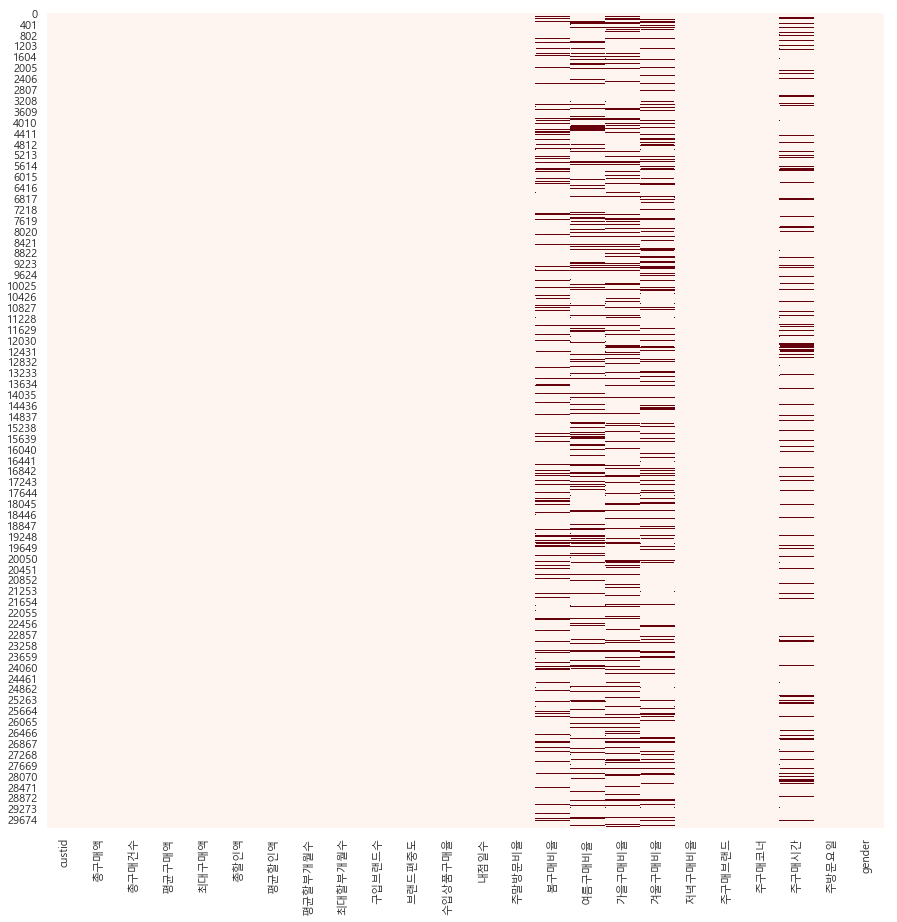

In [1026]:
plt.figure(figsize=(15,15))
sns.heatmap(train.isnull(), cbar=False,cmap="Reds")
plt.show()

#### 결측값 확인 시각화 결과

In [388]:
train["봄구매비율"].fillna(0, inplace=True)
train["가을구매비율"].fillna(0, inplace=True)
train["여름구매비율"].fillna(0, inplace=True)
train["겨울구매비율"].fillna(0, inplace=True)
test["봄구매비율"].fillna(0, inplace=True)
test["가을구매비율"].fillna(0, inplace=True)
test["여름구매비율"].fillna(0, inplace=True)
test["겨울구매비율"].fillna(0, inplace=True)

In [389]:
dataset = pd.concat(objs=[train,test],axis=0).reindex(columns=['custid', '총구매액', '총구매건수', '평균구매액', '최대구매액', '총할인액', '평균할인액', '평균할부개월수',
       '최대할부개월수', '구입브랜드수', '브랜드편중도', '수입상품구매율', '내점일수', '주말방문비율', '봄구매비율',
       '여름구매비율', '가을구매비율', '겨울구매비율', '저녁구매비율', '주구매브랜드', '주구매코너', '주구매시간',
       '주방문요일', 'gender'])

#### k-means를 통해 주구매시간 결측값 처리

In [390]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [391]:
le = LabelEncoder()
dataset['코너레이블'] = list(le.fit_transform(dataset.주구매코너.values))
dataset['브랜드레이블'] = list(le.fit_transform(dataset.주구매브랜드.values))

title_mapping = {'월':1,'화':2,'수':3,'목':4,'금':5,'토':6,'일':7}
dataset['title'] = dataset['주방문요일'].map(title_mapping)

In [392]:
dataset['코너레이블'] = list(le.fit_transform(dataset.주구매코너.values))
dataset['브랜드레이블'] = list(le.fit_transform(dataset.주구매브랜드.values))

title_mapping = {'월':1,'화':2,'수':3,'목':4,'금':5,'토':6,'일':7}
dataset['title'] = dataset['주방문요일'].map(title_mapping)

In [393]:
del dataset['주구매코너']
del dataset['주구매브랜드']
del dataset['주방문요일']

In [394]:
X_test = dataset[dataset.gender.isnull()]
X_test = X_test.dropna(axis=1)

In [395]:
X_test.shape

(19995, 22)

In [396]:
X_train = dataset.query('gender in [0,1]')
X_train= X_train.dropna(axis=1)
del X_train['gender']

In [397]:
X_train.shape

(30000, 22)

In [398]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7,algorithm='auto',random_state=42)
model.fit(X_train.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [399]:
predict = pd.DataFrame(model.predict(X_train.iloc[:,1:]))
predict.columns=['predict']
X_train['predict'] = predict

In [400]:
model = KMeans(n_clusters=7,algorithm='auto',random_state=42)
model.fit(X_test.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [401]:
predict = pd.DataFrame(model.predict(X_test.iloc[:,1:]))
predict.columns=['predict']
predict
X_test['predict'] = predict 

In [402]:
train = pd.merge(train,X_train[['custid','predict']],on='custid')

In [403]:
test = pd.merge(test,X_test[['custid','predict']],on='custid')

In [404]:
dataset = pd.concat([train,test],axis=0).reset_index().iloc[:,1:]

In [405]:
for i in dataset.주구매시간[dataset.주구매시간.isna()].index :
    if dataset.predict.loc[i] == 0 :
        dataset.주구매시간.loc[i] = dataset[dataset.predict == 0].주구매시간.mode()[0]
    elif dataset.predict.loc[i] == 1:
        dataset.주구매시간.loc[i] = dataset[dataset.predict==1].주구매시간.mode()[0]
    elif dataset.predict.loc[i] == 2:
        dataset.주구매시간.loc[i] = dataset[dataset.predict==2].주구매시간.mode()[0]
    elif dataset.predict.loc[i] == 3:
        dataset.주구매시간.loc[i] = dataset[dataset.predict==3].주구매시간.mode()[0]
    elif dataset.predict.loc[i] == 4:
        dataset.주구매시간.loc[i] = dataset[dataset.predict==4].주구매시간.mode()[0]
    elif dataset.predict.loc[i] == 5:
        dataset.주구매시간.loc[i] = dataset[dataset.predict==5].주구매시간.mode()[0]
    else :
        dataset.주구매시간.loc[i] = dataset[dataset.predict==6].주구매시간.mode()[0]

#### 작업과정 생략을 위해 전처리한 데이터프레임을 csv 형태로 저장

In [406]:
dataset.to_csv('dataset.csv',encoding="CP949")

In [722]:
dataset = pd.read_csv('dataset.csv',encoding='CP949').iloc[:,1:]
train = dataset.iloc[:30000,:]
test = dataset.iloc[30000:,:].drop('gender',axis=1)

#### train세트 수치형 자료 통계량

In [408]:
train.drop(['custid','gender'],axis=1).describe()

,predict,가을구매비율,겨울구매비율,구입브랜드수,내점일수,봄구매비율,브랜드편중도,수입상품구매율,여름구매비율,저녁구매비율,주구매시간,주말방문비율,총구매건수,총구매액,총할인액,최대구매액,최대할부개월수,평균구매액,평균할부개월수,평균할인액
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,3.000000e+04,30000.000000,30000.000000
mean,2.055867,0.235273,0.232717,17.513567,17.999400,0.281906,0.342929,0.179094,0.250104,0.223898,15.516867,0.398134,34.555100,3.402056e+06,1.152073e+05,6.495710e+05,3.632467,1.020029e+05,1.901824,3609.591506
std,2.303647,0.198606,0.202368,14.926048,19.057196,0.227281,0.215027,0.193038,0.212637,0.224879,2.411412,0.258735,40.059543,5.105445e+06,2.255333e+05,1.085766e+06,2.089912,9.010523e+04,0.711563,4046.594095
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,-1.139081e+07,-5.856100e+05,1.403600e+04,1.000000,-8.185000e+05,1.000000,-40925.000000
25%,0.000000,0.090909,0.085056,7.000000,6.000000,0.133333,0.187500,0.050000,0.083333,0.036364,14.000000,0.214286,10.000000,7.087475e+05,1.820000e+04,1.960000e+05,3.000000,5.464197e+04,1.421053,1330.351562
50%,0.000000,0.214286,0.205479,13.000000,12.000000,0.250000,0.346154,0.125000,0.229108,0.166667,16.000000,0.366667,21.000000,1.769817e+06,4.905500e+04,3.747000e+05,3.000000,8.116833e+04,1.826087,2555.331243
75%,5.000000,0.333333,0.329815,24.000000,23.000000,0.375000,0.500000,0.250000,0.357143,0.333333,18.000000,0.555556,44.000000,4.016975e+06,1.204575e+05,7.020000e+05,3.000000,1.226667e+05,2.247807,4504.706101
max,6.000000,1.000000,1.000000,182.000000,249.000000,1.000000,0.952663,1.000000,1.000000,1.000000,20.000000,1.000000,589.000000,1.142390e+08,6.222800e+06,7.200000e+07,12.000000,6.845000e+06,12.000000,152875.000000


In [409]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
custid     30000 non-null int64
gender     30000 non-null float64
predict    30000 non-null int64
가을구매비율     30000 non-null float64
겨울구매비율     30000 non-null float64
구입브랜드수     30000 non-null int64
내점일수       30000 non-null int64
봄구매비율      30000 non-null float64
브랜드편중도     30000 non-null float64
수입상품구매율    30000 non-null float64
여름구매비율     30000 non-null float64
저녁구매비율     30000 non-null float64
주구매브랜드     30000 non-null object
주구매시간      30000 non-null float64
주구매코너      30000 non-null object
주말방문비율     30000 non-null float64
주방문요일      30000 non-null object
총구매건수      30000 non-null int64
총구매액       30000 non-null int64
총할인액       30000 non-null int64
최대구매액      30000 non-null int64
최대할부개월수    30000 non-null int64
평균구매액      30000 non-null float64
평균할부개월수    30000 non-null float64
평균할인액      30000 non-null float64
dtypes: float64(13), int64(9), object(3)
memory usage: 5.7+ MB

#### test세트 수치형 자료 통계량

In [410]:
test.drop('custid',axis=1).describe()

,predict,가을구매비율,겨울구매비율,구입브랜드수,내점일수,봄구매비율,브랜드편중도,수입상품구매율,여름구매비율,저녁구매비율,주구매시간,주말방문비율,총구매건수,총구매액,총할인액,최대구매액,최대할부개월수,평균구매액,평균할부개월수,평균할인액
count,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,19995.000000,1.999500e+04,1.999500e+04,1.999500e+04,19995.000000,1.999500e+04,19995.000000,19995.000000
mean,1.684221,0.234244,0.233873,17.551988,17.940835,0.282075,0.344560,0.178527,0.249808,0.224354,15.522281,0.399205,34.497474,3.415056e+06,1.167078e+05,6.526733e+05,3.640460,1.024929e+05,1.911041,3641.501598
std,2.148696,0.196468,0.201429,14.854354,18.638017,0.226608,0.214418,0.191809,0.212686,0.223587,2.402243,0.257307,39.761056,5.105848e+06,2.504761e+05,1.006108e+06,2.088474,8.455670e+04,0.723344,4183.287447
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,-7.278000e+05,-4.100600e+05,1.390000e+04,1.000000,-6.616364e+04,1.000000,-9302.727273
25%,0.000000,0.090909,0.090909,7.000000,6.000000,0.133333,0.200000,0.051282,0.081800,0.040000,14.000000,0.217391,10.000000,7.200000e+05,1.840000e+04,1.980000e+05,3.000000,5.492723e+04,1.428571,1350.000000
50%,0.000000,0.215190,0.206897,13.000000,12.000000,0.250000,0.350000,0.125000,0.230769,0.166667,16.000000,0.370629,22.000000,1.819450e+06,5.091000e+04,3.850000e+05,3.000000,8.178990e+04,1.837209,2526.363636
75%,5.000000,0.333333,0.333333,24.000000,23.000000,0.375000,0.500000,0.250000,0.357143,0.333333,18.000000,0.555556,45.000000,4.075910e+06,1.232950e+05,7.213000e+05,3.000000,1.230211e+05,2.250000,4522.708333
max,6.000000,1.000000,1.000000,188.000000,242.000000,1.000000,0.968944,1.000000,1.000000,1.000000,20.000000,1.000000,672.000000,1.262201e+08,1.142995e+07,3.295000e+07,12.000000,2.765233e+06,12.000000,118150.000000


In [411]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 30000 to 49994
Data columns (total 24 columns):
custid     19995 non-null int64
predict    19995 non-null int64
가을구매비율     19995 non-null float64
겨울구매비율     19995 non-null float64
구입브랜드수     19995 non-null int64
내점일수       19995 non-null int64
봄구매비율      19995 non-null float64
브랜드편중도     19995 non-null float64
수입상품구매율    19995 non-null float64
여름구매비율     19995 non-null float64
저녁구매비율     19995 non-null float64
주구매브랜드     19995 non-null object
주구매시간      19995 non-null float64
주구매코너      19995 non-null object
주말방문비율     19995 non-null float64
주방문요일      19995 non-null object
총구매건수      19995 non-null int64
총구매액       19995 non-null int64
총할인액       19995 non-null int64
최대구매액      19995 non-null int64
최대할부개월수    19995 non-null int64
평균구매액      19995 non-null float64
평균할부개월수    19995 non-null float64
평균할인액      19995 non-null float64
dtypes: float64(12), int64(9), object(3)
memory usage: 3.7+ MB


## Train_set 성별 분포 확인

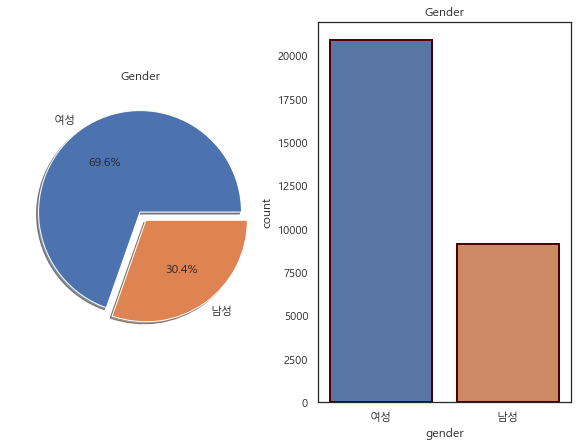

In [412]:
f,ax=plt.subplots(1,2,figsize=(10,7))
train['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=['여성','남성'])
ax[0].set_title('Gender')
ax[0].set_ylabel('')
sns.countplot('gender',data=train,ax=ax[1],linewidth='2',edgecolor=(0.3,0,0))
ax[1].set_title('Gender')
ax[1].set_xticklabels(['여성','남성'])
ax[1].grid(False)
plt.show()

<font color = 'blue'>

### 여성 70%, 남성30%의 인원 비중을 확인 할 수 있다.

#### 구매액 관련 부분에서 음수인 고객들은 환불을 받은 고객들이라고 유추 해 볼 수 있다.

In [413]:
b1 = train.총구매액<0
b2 = train.평균구매액<0
b3 = train.총할인액<0
b4 = train.평균할인액<0
print('환불 받은 고객 수 : {}명'.format(len(train.loc[b1|b2|b3|b4])))

환불 받은 고객 수 : 21명


#### 성별에 따른 수치형 데이터 평균값 확인(총구매액이 0원 초과인 고객들을 실질 구매 고객으로 선정)

In [414]:
train.loc[train.총구매액>0].iloc[:,1:].groupby('gender').agg('mean').round(2)

,predict,가을구매비율,겨울구매비율,구입브랜드수,내점일수,봄구매비율,브랜드편중도,수입상품구매율,여름구매비율,저녁구매비율,주구매시간,주말방문비율,총구매건수,총구매액,총할인액,최대구매액,최대할부개월수,평균구매액,평균할부개월수,평균할인액
gender,,,,,,,,,,,,,,,,,,,,
0.0,1.93,0.23,0.24,16.51,16.72,0.28,0.33,0.18,0.25,0.24,15.67,0.4,31.56,3010760.23,97983.12,584304.46,3.66,98129.07,1.91,3402.92
1.0,2.34,0.24,0.23,19.82,20.95,0.27,0.37,0.17,0.26,0.18,15.17,0.4,41.45,4304618.14,154872.85,799519.42,3.56,111168.03,1.89,4094.37


### 구매 시간별 남녀 구매 발생 횟수

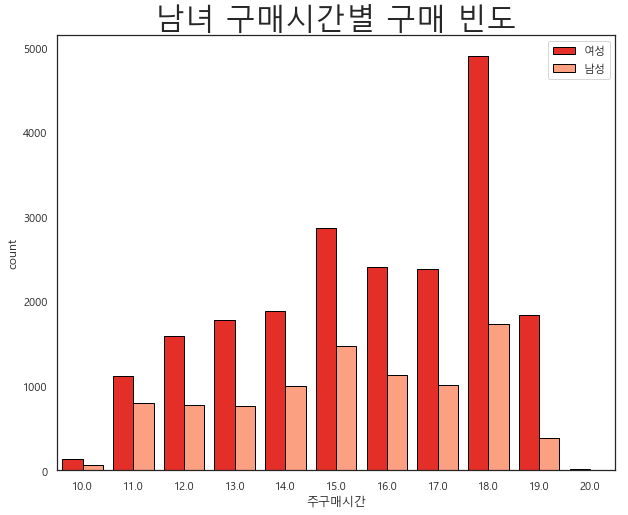

In [415]:
plt.figure(figsize=(10,8))
sns.countplot(x='주구매시간',hue='gender',data=train,palette='Reds_r',saturation=1.2,edgecolor=(0,0,0))
plt.legend(labels=['여성','남성'])
plt.title('남녀 구매시간별 구매 빈도',size=30)
plt.grid(False)
plt.show()

#### 남녀 모두 15시에 구매활동이 활발히 일어났고 남성의 경우 19시부터는 눈에 띄게 구매 빈도가 줄어들었다. 여성의 경우도 20시에 극소수의 구매활동만 발생했다.

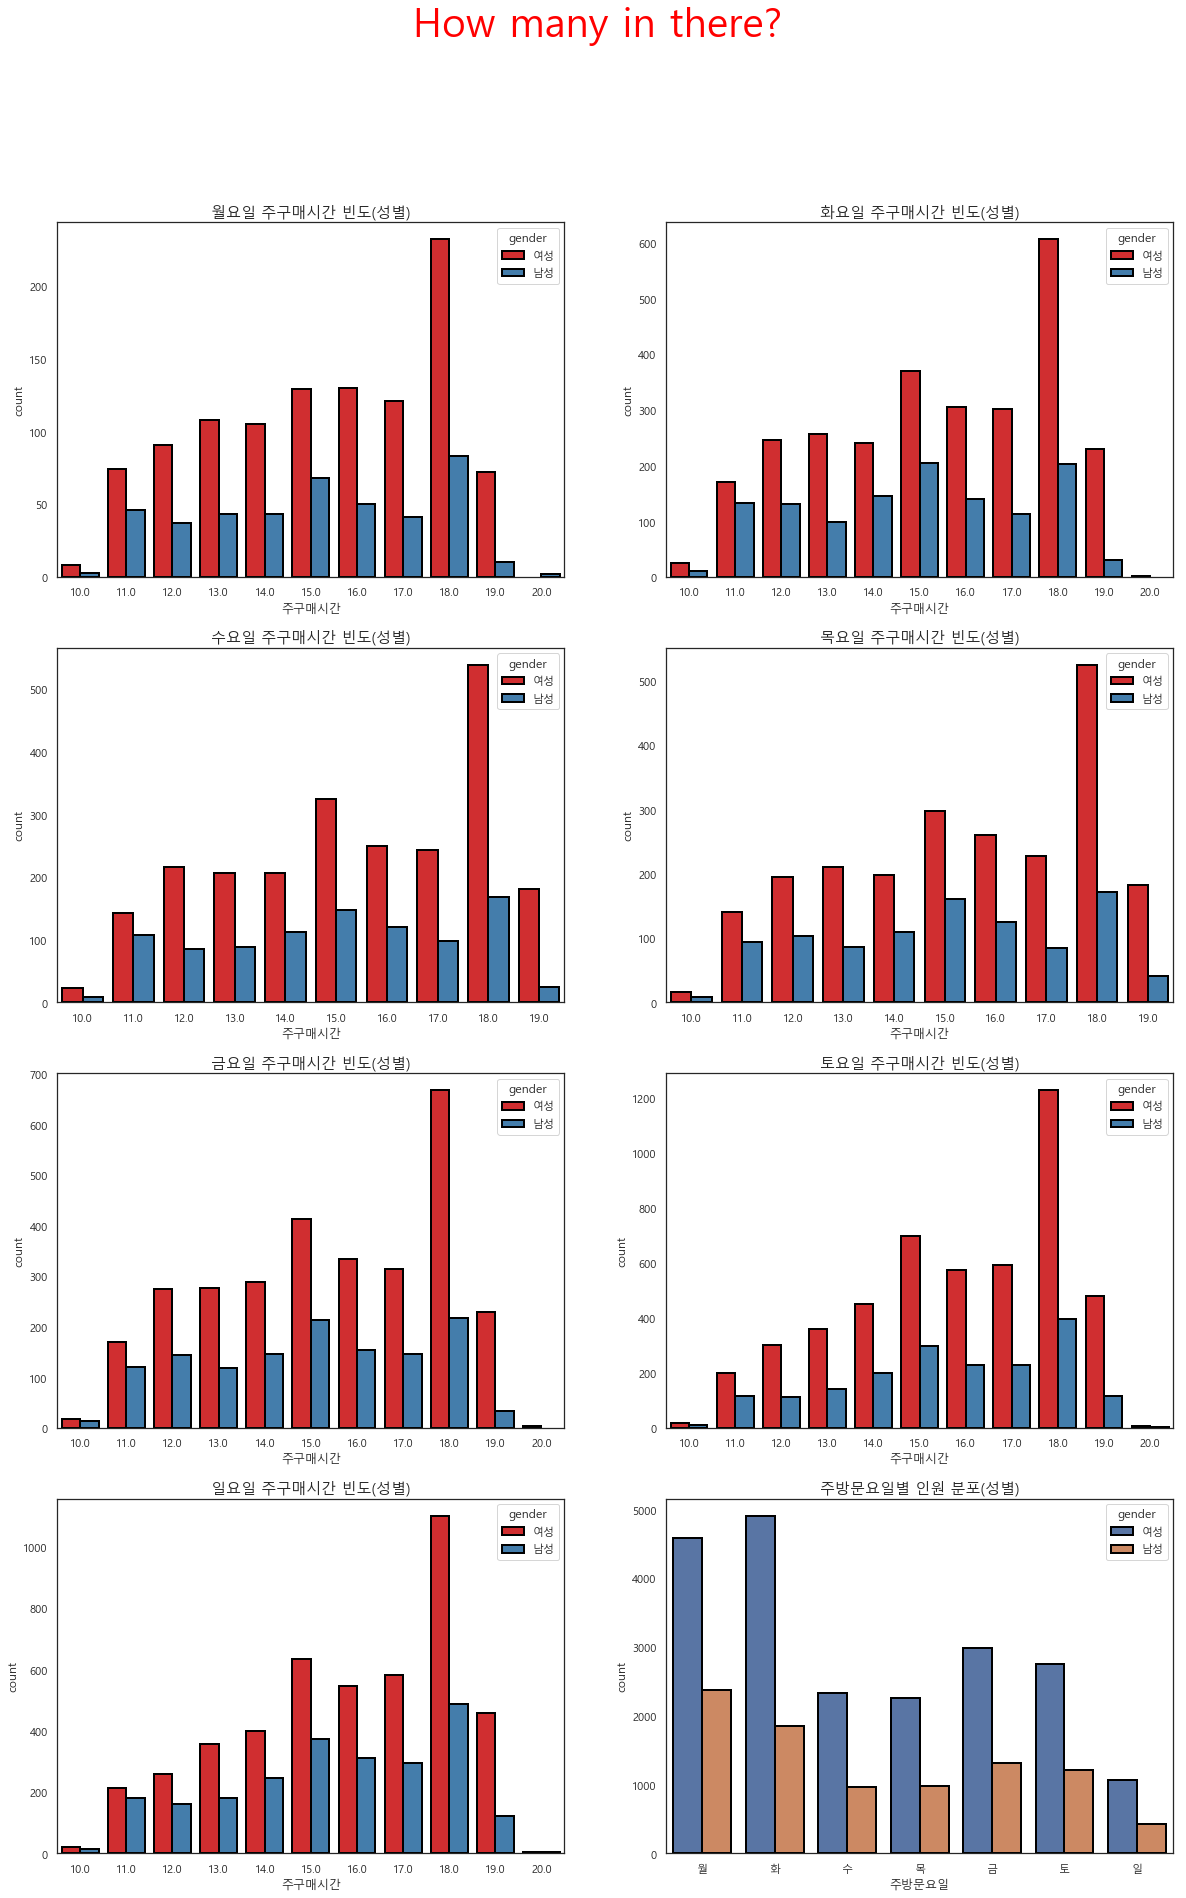

In [416]:
al = [0,0,1,1,2,2,3]
cl = [0,1,0,1,0,1,0]
d = ['월','화','수','목','금','토','일']
f,ax = plt.subplots(4,2,sharex=False)
f.suptitle('How many in there?', fontsize=40,color='red')
f.set_figwidth(20)
f.set_figheight(30)
for i,(y,z) in enumerate(zip(al,cl)):
    sns.countplot(x='주구매시간',hue='gender',data=train.loc[train.주방문요일==d[i]],
                  ax=ax[y,z],palette="Set1",linewidth=2,edgecolor=(0,0,0),saturation=0.8)
    ax[y,z].set_title('{}요일 주구매시간 빈도(성별)'.format(d[i]),size=15)
    ax[y,z].grid(False)
    ax[y,z].legend(labels=['여성','남성'],loc=1,title='gender')
sns.countplot(x='주방문요일',hue='gender',data=train,ax=ax[3,1],edgecolor=(0,0,0),linewidth=2)
ax[3,1].set_title('주방문요일별 인원 분포(성별)',size=15)
ax[3,1].set_xticklabels(d)
ax[3,1].legend(labels=['여성','남성'],title='gender')
ax[3,1].grid(False)
plt.show()

### 성별로 데이터셋 구분

In [417]:
train_m = train[train.gender==1]
train_w = train[train.gender==0]

### 1.4 Feature Analysis
#### 1.4.1 여성 데이터셋 columns 간의 상관관계 분석

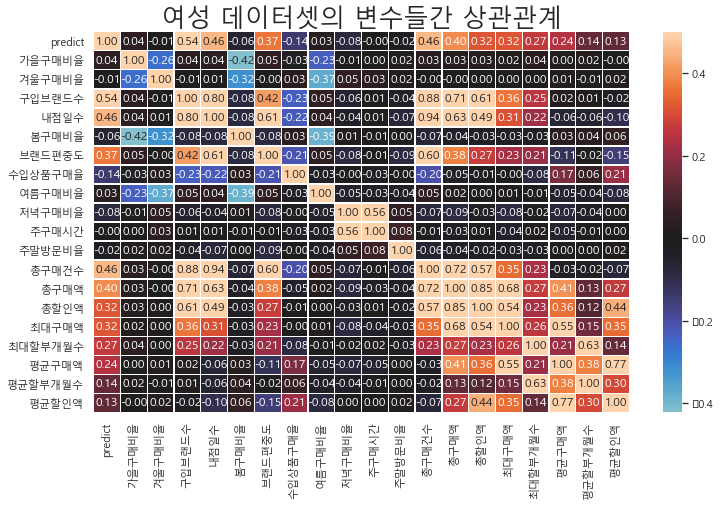

In [418]:
plt.figure(figsize=(12,7))
plt.title('여성 데이터셋의 변수들간 상관관계',size=25)
sns.heatmap(train_w.drop(['custid','gender'],axis=1).corr(), center=0,annot=True,fmt='.2f',linewidths=.3,vmax=.5)
plt.show()

#### 1.4.2 남성 데이터셋 columns 간의 상관관계 분석

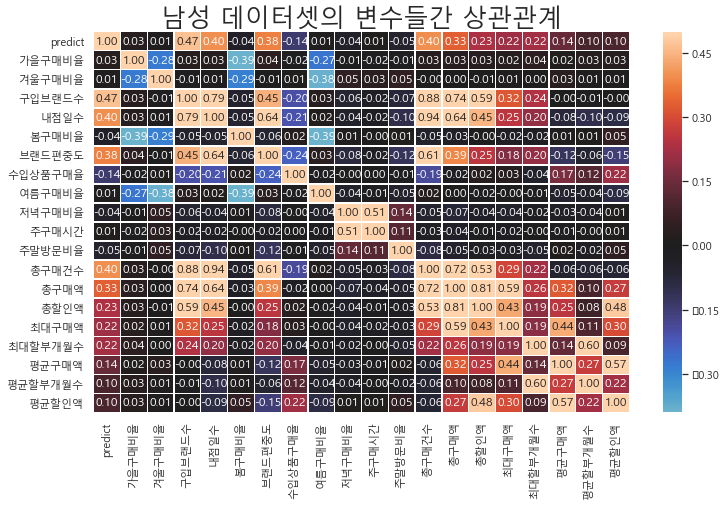

In [419]:
plt.figure(figsize=(12,7))
plt.title('남성 데이터셋의 변수들간 상관관계',size=25)
sns.heatmap(train_m.drop(['custid','gender'],axis=1).corr(), center=0,annot=True,fmt='.2f',linewidths=.3,vmax=.5)
plt.show()

### 1.5 Features

#### 1.5.1 주구매시간대 0=아침, 1=오후, 2=저녁

In [723]:
def t(x):
    if 8<=x<=12:
        return 0
    elif 12<x<=18:
        return 1
    else:
        return 2
train['주구매시간대'] = train.주구매시간.apply(t)

#### 1.5.2 평일주말 0=평일, 1=주말

In [724]:
def w(x):
    if x in ['토','일']:
        return 1
    else:
        return 0
train['평일주말'] = train.주방문요일.apply(w)

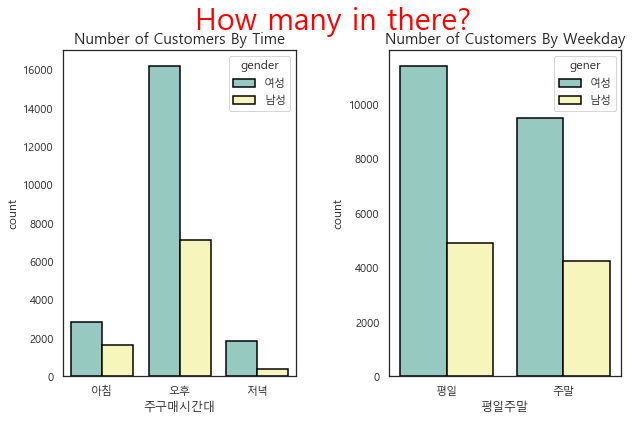

In [422]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))
f.suptitle('How many in there?', fontsize=30,color='red')
ax[0].grid(False);ax[1].grid(False)
plt.subplots_adjust(wspace=0.4)
sns.countplot(x = "주구매시간대",hue="gender", data = train, palette="Set3",edgecolor=(0,0,0),linewidth='1.5',ax=ax[0])
ax[0].set_title('Number of Customers By Time',size=15)
ax[0].set_xticklabels(['아침','오후','저녁'])
ax[0].legend(labels=['여성','남성'],title='gender')
sns.countplot(x = "평일주말",hue="gender", data = train, palette="Set3",edgecolor=(0,0,0),linewidth='1.5',ax=ax[1])
ax[1].set_title('Number of Customers By Weekday',size=15)
ax[1].set_xticklabels(['평일','주말'])
ax[1].legend(title='gener',labels=['여성','남성'])
plt.show()

#### 결과)
남녀간의 주구매시간대가 오후에서 차이가 가장 크며 비율상으로는 저녁이 제일 크다. 또한 평일과 주말의 경우는 평일에서의 남녀의 주구매패턴 차이가 크다고 볼 수 있다.

#### 1.5.3 변환총구매액 = 총구매액의 분포가 왼쪽으로 치우쳐져 있어 로그변환을 통해서 정규분포로 변환

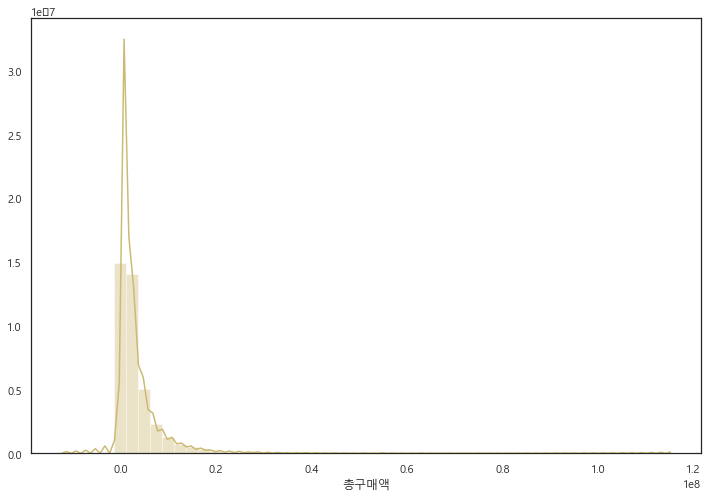

In [725]:
f= plt.figure(figsize=(12,8))
g = sns.distplot(train['총구매액'],color='y',label="Skewness:%.2f"%(dataset['총구매액']).skew())
g.grid(False)
plt.show()

In [726]:
train['변환총구매액'] = train['총구매액'].map(lambda i : np.log(0.00001*i) if i>0 else 0)

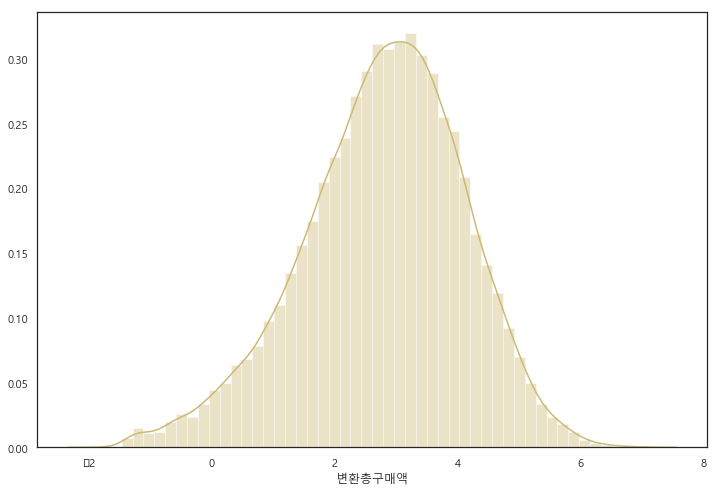

총구매액의 왜도 = -0.35919006272406967


In [727]:
f= plt.figure(figsize=(12,8))
g = sns.distplot(train['변환총구매액'],color='y')
g.grid(False)
plt.show()
print('총구매액의 왜도 = {}'.format(train.변환총구매액.skew(axis=0)))

#### 1.5.4 회원등급 = H백화점의 회원등급을 기준으로 분류(기준은 임의설정)

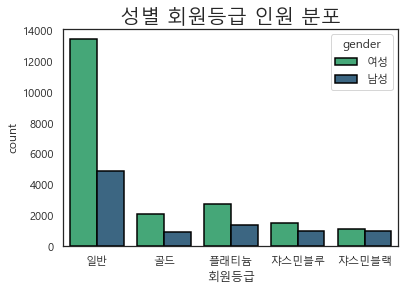

In [728]:
def cla(x):
    if x<=2500000:
        return '일반'
    elif 2500000<x<=3500000:
        return '골드'
    elif 3500000<x<=6000000:
        return '플래티늄'
    elif 6000000<x<=10000000:
        return '쟈스민블루'
    else:
        return '쟈스민블랙'
train['회원등급'] = train.총구매액.apply(cla)
plt.title('성별 회원등급 인원 분포',size=20)
g = sns.countplot(x = "회원등급", hue="gender", data = train,palette='viridis_r',edgecolor=(0,0,0),linewidth='1.5')
g.legend(title='gender',labels=['여성','남성'])
plt.grid(False)
plt.show()

#### 다른 등급에서와는 다르게 일반 등급에서는 남녀 비율의 차이가 심각하게 나고 있다.

#### 1.5.5 코너별 남녀 비율의 차이

In [729]:
dataset['코너레이블'] = list(le.fit_transform(dataset.주구매코너.values))
dataset['브랜드레이블'] = list(le.fit_transform(dataset.주구매브랜드.values))

In [730]:
corner=pd.DataFrame(dataset.코너레이블.unique())

In [731]:
mcorner = (dataset[dataset['gender']==1].코너레이블.value_counts() / len(dataset[dataset['gender']==1])).reset_index().rename(columns={'코너레이블':'남성코너'})
wcorner=(dataset[dataset['gender']==0].코너레이블.value_counts() / len(dataset[dataset['gender']==0])).reset_index().rename(columns={'코너레이블':'여성코너'})

In [732]:
corner.rename(columns={0:'index'},inplace=True)

In [733]:
corner = pd.merge(corner,mcorner,how='left').fillna(0)
corner = pd.merge(corner,wcorner,how='left').fillna(0)

In [734]:
corner['성별코너비교'] = corner.남성코너 - corner.여성코너
corner.rename(columns={'index':'코너레이블'},inplace=True)

In [735]:
corner = corner.drop(['남성코너','여성코너'],1)

In [737]:
def bra(x):
    if x in lst:
        return 1
    else :
        return 0
lst = list(corner[corner.성별코너비교>0].코너레이블.unique())
dataset['남녀코너비율'] = dataset.코너레이블.apply(bra)

In [738]:
dataset = pd.merge(dataset,corner.drop('성별코너비교',axis=1),on='코너레이블') # 남녀별 코너가 0이면 여성으로 예측 1이면 남성으로 예측

#### 1.5.6 브랜드별 남녀 비율의 차이

In [740]:
brand =pd.DataFrame(dataset.브랜드레이블.unique())

In [741]:
mbrand = (dataset[dataset['gender']==1].브랜드레이블.value_counts() / len(dataset[dataset['gender']==1])).reset_index().rename(columns={'브랜드레이블':'남성브랜드'})
wbrand=(dataset[dataset['gender']==0].브랜드레이블.value_counts() / len(dataset[dataset['gender']==0])).reset_index().rename(columns={'브랜드레이블':'여성브랜드'})

In [742]:
brand.rename(columns={0:'index'},inplace=True)

In [743]:
brand = pd.merge(brand,mbrand,how='left').fillna(0)
brand = pd.merge(brand,wbrand,how='left').fillna(0)

In [744]:
brand['성별브랜드비교'] = brand.남성브랜드 - brand.여성브랜드
brand.rename(columns={'index':'브랜드레이블'},inplace=True)

In [745]:
brand = brand.drop(['남성브랜드','여성브랜드'],1)

In [748]:
def bra(x):
    if x in lst:
        return 1
    else :
        return 0
lst = list(brand[brand.성별브랜드비교>0].브랜드레이블.unique())
dataset['남녀브랜드비율'] = dataset.브랜드레이블.apply(bra)

In [749]:
dataset = pd.merge(dataset,brand.drop('성별브랜드비교',axis=1),on='브랜드레이블') # 남녀별브랜드가 0이면 여성 1이면 남성으로 간주

In [866]:
train = dataset.query('gender in [0,1]')
test = dataset[dataset.gender.isnull()].drop('gender',axis=1)

### 1.6 성별 데이터셋 분석

### 성별 데이터셋 재설정

In [755]:
train_m = train[train.gender==1]
train_w = train[train.gender==0]

### gender가 여성인 데이터 분석

#### 여성의 주구매시간 및 주방문요일별 인원분포 

In [446]:
pd.crosstab(train_w.주구매시간,train_w.주방문요일,aggfunc='count',values=train_w.custid).fillna(0).reindex(columns = ['월','화','수','목','금','토','일']).style.background_gradient(cmap='autumn_r')

주방문요일,월,화,수,목,금,토,일
주구매시간,,,,,,,
10.0,8,26,23,17,17,18,21
11.0,74,170,143,141,169,201,214
12.0,91,246,217,195,275,302,259
13.0,108,257,207,210,277,360,357
14.0,105,240,206,198,288,450,399
15.0,129,369,325,297,413,696,635
16.0,130,305,250,260,335,575,545
17.0,121,301,244,227,314,593,581
18.0,232,606,539,525,668,1227,1102


#### 결과) 
모든 요일에 걸쳐서 15시에 가장 많은 구매활동이 발생하고 20시 이후에는 극소수의 구매만 일어난다. 또한 주말에 가까워질수록 아침부터 활발한 구매활동이 이루어진다.

### 구매 시간대별 구매 횟수 상위 5개 브랜드

In [447]:
f = train_w.groupby('주구매시간')['주구매브랜드'].agg([('최다구매브랜드1',lambda x:x.value_counts().index[0]),('최다구매브랜드2',lambda x:x.value_counts().index[1]),
                                         ('최다구매브랜드3',lambda x:x.value_counts().index[2]),('최다구매브랜드4',lambda x:x.value_counts().index[3]),
                                         ('최다구매브랜드5',lambda x:x.value_counts().index[4])])
f

,최다구매브랜드1,최다구매브랜드2,최다구매브랜드3,최다구매브랜드4,최다구매브랜드5
주구매시간,,,,,
10.0,식품,아모레,크리니크,랑콤,샤넬
11.0,식품,랑콤,에스티로더,크리니크,아모레
12.0,식품,랑콤,에스티로더,크리니크,아모레
13.0,식품,랑콤,아모레,크리니크,에스티로더
14.0,식품,랑콤,크리니크,에스티로더,아모레
15.0,식품,랑콤,에스티로더,크리니크,샤넬
16.0,식품,랑콤,샤넬,지오다노,크리니크
17.0,식품,랑콤,샤넬,크리니크,지오다노
18.0,식품,랑콤,크리니크,에스티로더,지오다노


#### 결과)
20시를 제외한 모든 시간대에 식품의 구매 빈도가 제일 높고 대체적으로 화장품브랜드가 주구매브랜드로 자리잡고 있다.

#### 여성 고객의 요일 및 시간대별 최다 주구매브랜드(식품제외)

In [448]:
f = train_w.query('주구매브랜드!="식품"').groupby(['주방문요일','주구매시간','주구매브랜드'])['custid'].agg([('방문횟수',lambda x:x.value_counts().index[0])]).reset_index()
w = train_w.주방문요일.unique()
h = train_w.주구매시간.unique()

In [449]:
a = []
b = []
c = []
for i in w:
    for j in h:
        d = f.query("주방문요일 ==@i and 주구매시간 ==@j").sort_values(by='주구매시간',ascending=False)
        if len(d)==0:
            continue
        c.append(f.query("주방문요일 ==@i and 주구매시간 ==@j").sort_values(by='방문횟수',ascending=False).iloc[0,2])
        a.append(i)
        b.append(j)

In [450]:
pd.pivot_table(pd.DataFrame({'Day':a,"Hour":b,"Brand":c}),index="Hour",columns='Day',aggfunc=lambda x: x,values="Brand",fill_value="").reindex(columns = ['월', '화', '수','목','금','토','일'])

Day,월,화,수,목,금,토,일
Hour,,,,,,,
10.0,ENC,아모레,아베다,크리니크,마리끌레르,랑콤,노스
11.0,미스지,더바디,노티카,미키클럽,폴로보이즈,NUK,지오다노쥬니어
12.0,FNJ extra,CP컴퍼니,레노마수영복,엘지화학,소다(여성),금강여성현금,바비브라운
13.0,해림/욕실,ABFZ,삼성,메쎄,금양양말,신일,거영
14.0,이동수,버버리,바비브라운,이복희,엘지화학,슈프리미아,메트로씨티
15.0,지오다노,랑콤,레노마골프,막스앤스펜서수입의류,그림,톰보이,폴로보이즈
16.0,구찌,지아니베르사체,엘르뿌뽕,시슬리,더바디,데무,막스앤스펜서수입의류
17.0,닥스,ABFZ,폴로,베이비케어,리바이스,미쏘니,WWS
18.0,소다,닥스수영복,루이까또즈,먼싱웨어,비너스,D-PULSE,카디날


#### 여성 고객의 요일 및 시간대별 최다 주구매코너

In [451]:
f = train_w.groupby(['주방문요일','주구매시간','주구매코너'])['custid'].agg([('방문횟수',lambda x:x.value_counts().index[0])]).reset_index()
w = train_w.주방문요일.unique()
h = train_w.주구매시간.unique()

In [452]:
a = []
b = []
c = []
for i in w:
    for j in h:
        d = f.query("주방문요일 ==@i and 주구매시간 ==@j").sort_values(by='주구매시간',ascending=False)
        if len(d)==0:
            continue
        c.append(f.query("주방문요일 ==@i and 주구매시간 ==@j").sort_values(by='방문횟수',ascending=False).iloc[0,2])
        a.append(i)
        b.append(j)

In [453]:
pd.pivot_table(pd.DataFrame({'Day':a,"Hour":b,"Corner":c}),index="Hour",columns='Day',aggfunc=lambda x: x,values="Corner",fill_value="").reindex(columns = ['월', '화', '수','목','금','토','일'])

Day,월,화,수,목,금,토,일
Hour,,,,,,,
10.0,일용잡화,국산화장품,주방용품,가방,LB침구,국산화장품,남성구두
11.0,브랜드침구,국산화장품,엘레강스,골프웨어,스포츠단품,생선,국산화장품
12.0,욕실용품,일용잡화,아동단품,임대화장품,트래디셔널캐주얼,남성구두,스포츠캐주얼
13.0,내의,야채,골프웨어,건어물,진캐주얼,냉난방,영트랜드
14.0,영캐주얼,디자이너숍,골프단품,여성구두,완구,헤어ACC,골프(LC)
15.0,진캐주얼,캐릭터슈즈,영커리어캐주얼,수예인테리어소품,국내종합화장품,우산장갑,영커리어캐주얼
16.0,수입의류,스타킹,용기보증,미시캐주얼,국내화장품,문화,셔츠
17.0,셔츠,임대을,가방,잡화,아동복,캐리어캐주얼,수입구두
18.0,임대화장품,골프웨어,넥타이,냉장식품,레이디숍A,일용잡화,아동


In [458]:
train_w.groupby('회원등급')['주구매브랜드'].agg({'최다구매코너1':lambda x: x.value_counts().index[0],
                                   '최다구매코너2':lambda x: x.value_counts().index[1],
                                   '최다구매코너3':lambda x: x.value_counts().index[2],
                                   '최다구매코너4':lambda x: x.value_counts().index[3],
                                   '최다구매코너5':lambda x: x.value_counts().index[5]}).reindex(['일반','골드','플래티늄','쟈스민블루','쟈스민블랙'])

,최다구매코너1,최다구매코너2,최다구매코너3,최다구매코너4,최다구매코너5
회원등급,,,,,
일반,식품,랑콤,크리니크,에스티로더,아모레
골드,식품,랑콤,지오다노,에스티로더,크리니크
플래티늄,식품,랑콤,에스티로더,지오다노,샤넬
쟈스민블루,식품,에스티로더,랑콤,시슬리,시세이도
쟈스민블랙,식품,시슬리,타임,마인,에스티로더


In [459]:
train_w.groupby('회원등급')['주구매코너'].agg({'최다구매코너1':lambda x: x.value_counts().index[0],
                                   '최다구매코너2':lambda x: x.value_counts().index[1],
                                   '최다구매코너3':lambda x: x.value_counts().index[2],
                                   '최다구매코너4':lambda x: x.value_counts().index[3],
                                   '최다구매코너5':lambda x: x.value_counts().index[5]}).reindex(['일반','골드','플래티늄','쟈스민블루','쟈스민블랙'])

,최다구매코너1,최다구매코너2,최다구매코너3,최다구매코너4,최다구매코너5
회원등급,,,,,
일반,수입종합화장품,용기보증,영캐주얼,진캐주얼,란제리
골드,수입종합화장품,용기보증,영캐주얼,진캐주얼,아동복
플래티늄,수입종합화장품,용기보증,영캐주얼,진캐주얼,캐릭터
쟈스민블루,수입종합화장품,용기보증,영캐주얼,진캐주얼,캐릭터
쟈스민블랙,용기보증,수입종합화장품,영캐주얼,아동복,캐릭터


In [460]:
train_w.groupby('회원등급').agg({'브랜드편중도':'mean','주구매시간':'mean',
                             '구입브랜드수':'mean','수입상품구매율':'mean',
                             '내점일수':'mean','평균할부개월수':'mean',
                             '총구매액':'mean','주방문요일':lambda x: x.value_counts().index[0]}).reindex(['일반','골드','플래티늄','쟈스민블루','쟈스민블랙']).style.background_gradient(cmap='autumn')

,브랜드편중도,주구매시간,구입브랜드수,수입상품구매율,내점일수,평균할부개월수,총구매액,주방문요일
회원등급,,,,,,,,
일반,0.266603,15.7098,9.54368,0.197788,9.18824,1.83147,993907,토
골드,0.388141,15.848,20.0939,0.138326,19.8523,2.00745,2.9633e+06,일
플래티늄,0.435163,15.6211,25.9253,0.143643,26.914,2.04211,4.56514e+06,일
쟈스민블루,0.485566,15.4263,34.462,0.152125,36.5556,2.05779,7.62502e+06,일
쟈스민블랙,0.540245,15.292,45.9628,0.189919,49.2646,2.12611,1.71465e+07,일


### gender가 남성인 데이터 분석

#### 남성의 주구매시간 및 주방문요일별 인원분포 

In [461]:
pd.crosstab(train_m.주구매시간,train_m.주방문요일,aggfunc='count',values=train_m.custid).fillna(0).reindex(columns = ['월','화','수','목','금','토','일']).style.background_gradient(cmap='winter_r')

주방문요일,월,화,수,목,금,토,일
주구매시간,,,,,,,
10.0,3,11,8,8,13,11,13
11.0,46,132,107,94,120,116,181
12.0,37,131,85,104,145,112,160
13.0,43,99,89,86,119,142,182
14.0,43,145,112,110,146,200,246
15.0,68,205,148,161,214,297,373
16.0,50,140,121,125,154,229,311
17.0,41,114,98,84,147,227,296
18.0,83,203,168,172,218,395,488


### 주구매시간대별 주구매 상위 5개 코너

In [462]:
f = train_m.groupby('주구매시간')['주구매코너'].agg([('최다구매코너1',lambda x:x.value_counts().index[0]),('최다구매코너2',lambda x:x.value_counts().index[1]),
                                         ('최다구매코너3',lambda x:x.value_counts().index[2]),('최다구매코너4',lambda x:x.value_counts().index[3]),
                                         ('최다구매코너5',lambda x:x.value_counts().index[4])])
f

,최다구매코너1,최다구매코너2,최다구매코너3,최다구매코너4,최다구매코너5
주구매시간,,,,,
10.0,수입종합화장품,용기보증,미확인코너,아동,야채
11.0,수입종합화장품,용기보증,아동복,아동,진캐주얼
12.0,수입종합화장품,용기보증,아동복,진캐주얼,아동
13.0,수입종합화장품,용기보증,진캐주얼,아동복,영캐주얼
14.0,수입종합화장품,용기보증,진캐주얼,아동복,미확인코너
15.0,수입종합화장품,용기보증,진캐주얼,골프웨어,아동복
16.0,수입종합화장품,용기보증,진캐주얼,미확인코너,영캐주얼
17.0,수입종합화장품,용기보증,진캐주얼,아동복,영캐주얼
18.0,수입종합화장품,용기보증,진캐주얼,영캐주얼,아동복


#### 남성 고객의 요일 및 시간대별 최다 주구매브랜드(식품제외)

In [463]:
f = train_m.query('주구매브랜드!="식품"').groupby(['주방문요일','주구매시간','주구매브랜드'])['custid'].agg([('방문횟수',lambda x:x.value_counts().index[0])]).reset_index()
w = train_m.주방문요일.unique()
h = train_m.주구매시간.unique()

In [464]:
a = []
b = []
c = []
for i in w:
    for j in h:
        d = f.query("주방문요일 ==@i and 주구매시간 ==@j").sort_values(by='주구매시간',ascending=False)
        if len(d)==0:
            continue
        c.append(f.query("주방문요일 ==@i and 주구매시간 ==@j").sort_values(by='방문횟수',ascending=False).iloc[0,2])
        a.append(i)
        b.append(j)

In [465]:
pd.pivot_table(pd.DataFrame({'Day':a,"Hour":b,"Brand":c}),index="Hour",columns='Day',aggfunc=lambda x: x,values="Brand",fill_value="").reindex(columns = ['월', '화', '수','목','금','토','일'])

Day,월,화,수,목,금,토,일
Hour,,,,,,,
10.0,랑콤,써스데이아일앤드,소나티나,까사스틸레,크리니크,NUK,델지
11.0,시슬리,레노마골프,아레나,타임남성,알타모다,012베네통,마에스트로
12.0,랑콤,라프레리,1492마일즈,블루독,지오다노,랑콤,메이컵포에버
13.0,니나리찌,랄프로렌,FUBU,루츠,나이키골프,크리스챤디올화장품,루비나
14.0,폴로화장품,CC클럽,메이컵포에버,비꼴리끄,올리비에,골든벨,비너스
15.0,닥스골프,아이그너,조셉싸이벨,길무역/수입도자기,쟝폴클라리쎄,스포트리플레이,옴파로스
16.0,트라이엄프,엘리자베스아덴,피에르가르뎅,오브제,베베,메이컵포에버,G보티첼리
17.0,텔레그라프,랑콤,시슬리,아베다,프라다현대본점,TBJ,니나리찌양말직매입
18.0,볼파,성일완구,아모레,NUK,클라란스,퀵실버,로얄코펜하겐


#### 남성 고객의 요일 및 시간대별 최다 주구매코너

In [466]:
f = train_m.groupby(['주방문요일','주구매시간','주구매코너'])['custid'].agg([('방문횟수',lambda x:x.value_counts().index[0])]).reset_index()
w = train_m.주방문요일.unique()
h = train_m.주구매시간.unique()

In [467]:
a = []
b = []
c = []
for i in w:
    for j in h:
        d = f.query("주방문요일 ==@i and 주구매시간 ==@j").sort_values(by='주구매시간',ascending=False)
        if len(d)==0:
            continue
        c.append(f.query("주방문요일 ==@i and 주구매시간 ==@j").sort_values(by='방문횟수',ascending=False).iloc[0,2])
        a.append(i)
        b.append(j)

In [468]:
pd.pivot_table(pd.DataFrame({'Day':a,"Hour":b,"Corner":c}),index="Hour",columns='Day',aggfunc=lambda x: x,values="Corner",fill_value="").reindex(columns = ['월', '화', '수','목','금','토','일'])

Day,월,화,수,목,금,토,일
Hour,,,,,,,
10.0,수입종합화장품,수영복,아동,란제리,수입도자기,미확인코너,가방
11.0,국내화장품,생선,수영복,수영복,수입부띠끄,미확인코너,아동복
12.0,완구,임대을,수입향수,미확인코너,골프웨어,냉장식품,신생아
13.0,트래디셔널,미시캐주얼,스포츠캐주얼,문구(문화),골프(국내),미씨캐릭터,영트랜드
14.0,셔츠,로얄부틱2F,용기보증,수입종합화장품,하이캐주얼,니트웨어,란제리
15.0,골프(국내),아웃도어,양말,일용잡화,헤어ACC,셔츠,단품
16.0,영캐주얼,욕실용품,국산화장품,캐주얼구두,수입도자기,여성구두,수입종합화장품
17.0,내셔널,골프웨어,미확인코너,국산화장품,수입ACC,소형전기,손수건
18.0,스포츠단품,팬시,국산화장품,수입종합화장품,싸롱화,하이캐주얼,아웃도어


In [469]:
train_m.groupby('회원등급')['주구매코너'].agg({'최다구매코너1':lambda x: x.value_counts().index[0],
                                   '최다구매코너2':lambda x: x.value_counts().index[1],
                                   '최다구매코너3':lambda x: x.value_counts().index[2],
                                   '최다구매코너4':lambda x: x.value_counts().index[3],
                                   '최다구매코너5':lambda x: x.value_counts().index[5]}).reindex(['일반','골드','플래티늄','쟈스민블루','쟈스민블랙'])

,최다구매코너1,최다구매코너2,최다구매코너3,최다구매코너4,최다구매코너5
회원등급,,,,,
일반,수입종합화장품,용기보증,진캐주얼,미확인코너,영캐주얼
골드,수입종합화장품,용기보증,진캐주얼,영캐주얼,야채
플래티늄,용기보증,수입종합화장품,진캐주얼,아동복,영캐주얼
쟈스민블루,용기보증,수입종합화장품,아동복,진캐주얼,야채
쟈스민블랙,용기보증,수입종합화장품,진캐주얼,아동복,아동


In [470]:
train_m.groupby('회원등급')['주구매브랜드'].agg({'최다구매브랜드1':lambda x: x.value_counts().index[0],
                                   '최다구매브랜드2':lambda x: x.value_counts().index[1],
                                   '최다구매브랜드3':lambda x: x.value_counts().index[2],
                                   '최다구매브랜드4':lambda x: x.value_counts().index[3],
                                   '최다구매브랜드5':lambda x: x.value_counts().index[5]}).reindex(['일반','골드','플래티늄','쟈스민블루','쟈스민블랙'])

,최다구매브랜드1,최다구매브랜드2,최다구매브랜드3,최다구매브랜드4,최다구매브랜드5
회원등급,,,,,
일반,식품,랑콤,샤넬,지오다노,에스티로더
골드,식품,랑콤,지오다노,폴로,에스티로더
플래티늄,식품,지오다노,폴로,랑콤,에스티로더
쟈스민블루,식품,지오다노,아베다,폴로,에스티로더
쟈스민블랙,식품,폴로,시슬리,에스티로더,시세이도


In [471]:
train_m.groupby('회원등급').agg({'브랜드편중도':'mean','주구매시간':'mean',
                          '구입브랜드수':'mean','수입상품구매율':'mean',
                          '내점일수':'mean','평균할부개월수':'mean',
                          '총구매액':'mean','주방문요일':lambda x: x.value_counts().index[0]}).reindex(['일반','골드','플래티늄','쟈스민블루','쟈스민블랙']).style.background_gradient(cmap='winter_r')

,브랜드편중도,주구매시간,구입브랜드수,수입상품구매율,내점일수,평균할부개월수,총구매액,주방문요일
회원등급,,,,,,,,
일반,0.27715,15.2288,9.54933,0.19542,9.27745,1.81921,1.07023e+06,일
골드,0.41379,15.3692,19.7532,0.139531,20.5243,1.9449,2.97201e+06,일
플래티늄,0.451299,15.1317,25.5386,0.138383,27.507,1.91811,4.59081e+06,일
쟈스민블루,0.493881,14.9265,33.855,0.148513,37.2564,1.95308,7.72919e+06,일
쟈스민블랙,0.543889,14.958,48.8188,0.183658,53.8147,2.04204,1.78218e+07,일


### 변수별 상관관계 분석

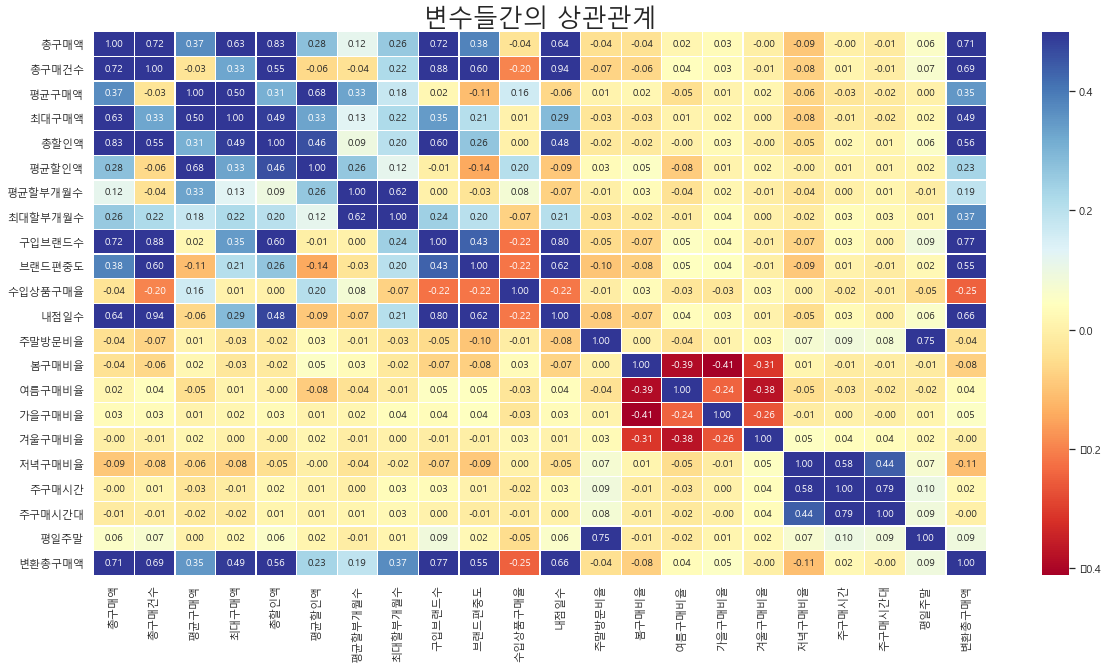

In [47]:
plt.figure(figsize=(20,10))
plt.title('변수들간의 상관관계',size=25)
sns.heatmap(train.drop(['custid','gender'],axis=1).corr(), annot=True, cmap="RdYlBu",fmt='.2f',linewidths=.3,vmax=.5)
plt.show()

## Part2 : Predictive Modeling

In [841]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV,RandomizedSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier,BaggingClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import (classification_report,confusion_matrix,precision_recall_curve,
                             roc_curve,auc)
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, plot_importance
import xgboost as xg
import scikitplot as skplt

#### 1) Logistic Regression
#### 2) DecisionTreeClassifier
#### 3) Random Forest
#### 4) KNeighborsClassifier
#### 5) SGDClassifier
#### 6) GradientBoostingClassifier
#### 7) MLPClassifier
#### 8) ExtraTreeClassifier
#### 9) AdaBoostClassifier
#### 10) LinearDiscriminantAnalysis
#### 11) XGBClassifier
#### 12) GaussianNB
#### 13) ExtraClassifier

In [169]:
np.random.seed(42)

In [876]:
X = dataset.query('gender in [0,1]').drop(['주구매코너','custid','gender','주구매브랜드','주방문요일','코너레이블','브랜드레이블','predict','여름구매비율','저녁구매비율','겨울구매비율','봄구매비율'],axis=1)
Xt = dataset[dataset.gender.isnull()].drop(['주구매코너','custid','gender','주구매브랜드','주방문요일','코너레이블','브랜드레이블','predict','여름구매비율','저녁구매비율','겨울구매비율','봄구매비율'],axis=1)
y = dataset.query('gender in [0,1]')['gender']

In [881]:
scaler = StandardScaler()

In [882]:
scaled_features = scaler.fit_transform(X)

In [883]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)

In [954]:
score = []

### 1) Logistic Regression

In [885]:
log_clf = LogisticRegression(random_state=42)

In [886]:
log_clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [887]:
log_score = roc_auc_score(y_test,log_clf.predict_proba(X_test)[:,1])

In [955]:
score.append(log_score)

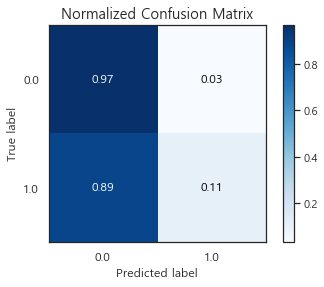

In [889]:
pred_log = log_clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_log, normalize=True)
plt.show()

### 2) DecisionClassifier

In [890]:
dcs = DecisionTreeClassifier(random_state=42)

In [891]:
dcs.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [892]:
dcs_score = roc_auc_score(y_test,dcs.predict_proba(X_test)[:,1])

In [956]:
score.append(dcs_score)

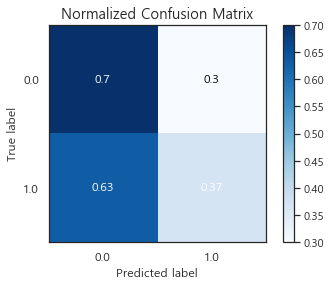

In [894]:
pred_dcs = dcs.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_dcs, normalize=True)
plt.show()

### 3) RandomForest

In [895]:
rf = RandomForestClassifier(random_state=42)

In [896]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [897]:
rf_score = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])

In [957]:
score.append(rf_score)

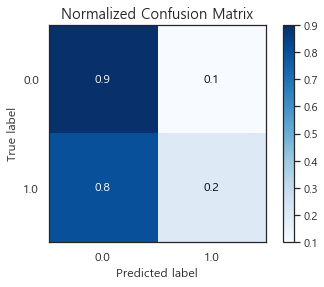

In [899]:
pred_rf = rf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_rf, normalize=True)
plt.show()

### 4) KNeighborsClassifier

In [900]:
knn = KNeighborsClassifier()

In [901]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [902]:
knn_score = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])

In [958]:
score.append(knn_score)

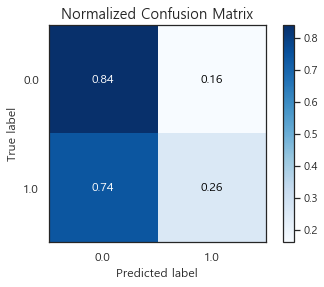

In [904]:
pred_knn = knn.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_knn, normalize=True)
plt.show()

### 5) SGDClassifier

In [905]:
sgd = SGDClassifier(random_state=42,loss='log')

In [906]:
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [907]:
sgd_score = roc_auc_score(y_test,sgd.predict_proba(X_test)[:,1])

In [959]:
score.append(sgd_score)

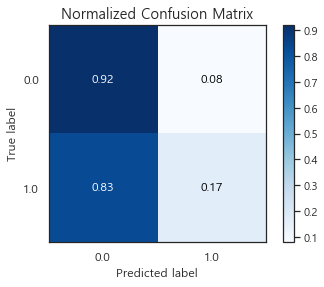

In [909]:
pred_sgd = sgd.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_sgd, normalize=True)
plt.show()

### 6) GradientBoostingClassifier

In [910]:
GBC = GradientBoostingClassifier(random_state=42)

In [911]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [912]:
GBC_score = roc_auc_score(y_test,GBC.predict_proba(X_test)[:,1])

In [960]:
score.append(GBC_score)

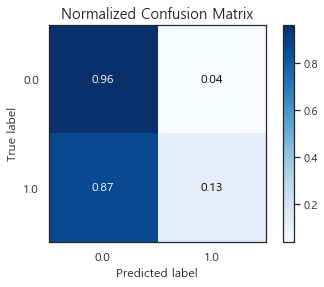

In [915]:
pred_GBC = GBC.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_GBC, normalize=True)
plt.show()

### 7) MLPClassifier

In [916]:
mlp = MLPClassifier(random_state=42)

In [917]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [918]:
mlp_score = roc_auc_score(y_test,mlp.predict_proba(X_test)[:,1])

In [961]:
score.append(mlp_score)

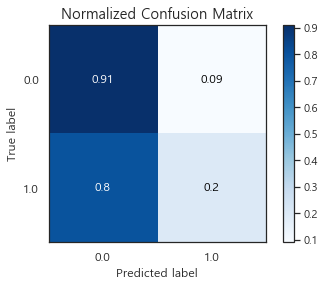

In [920]:
pred_mlp = mlp.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_mlp, normalize=True)
plt.show()

### 8) ExtraTreeClassifier

In [921]:
etc = ExtraTreeClassifier(random_state=42)

In [922]:
etc.fit(X_train,y_train)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=42, splitter='random')

In [923]:
etc_score = roc_auc_score(y_test,etc.predict_proba(X_test)[:,1])

In [962]:
score.append(etc_score)

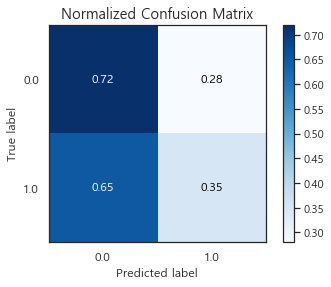

In [925]:
pred_etc = etc.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_etc, normalize=True)
plt.show()

### 9) AdaBoostClassifier

In [926]:
dtc = DecisionTreeClassifier(random_state=42)
abc = AdaBoostClassifier(dtc,random_state=42,learning_rate=0.1)

In [927]:
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=0.1, n_estimators=50, random_state=42)

In [928]:
abc_score = roc_auc_score(y_test,abc.predict_proba(X_test)[:,1])

In [963]:
score.append(abc_score)

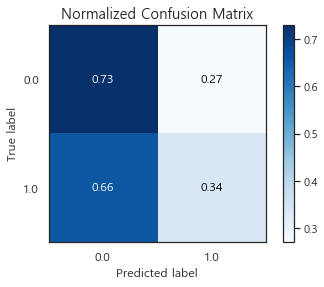

In [930]:
pred_abc = abc.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_abc, normalize=True)
plt.show()

### 10) LinearDiscriminantAnalysis

In [931]:
lda = LinearDiscriminantAnalysis()

In [933]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [934]:
lda_score = roc_auc_score(y_test,lda.predict_proba(X_test)[:,1])

In [964]:
score.append(lda_score)

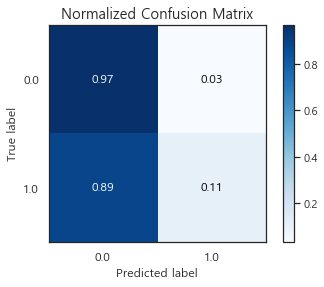

In [936]:
pred_lda = lda.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_lda, normalize=True)
plt.show()

### 11) XGBClassifier

In [937]:
xgb = xg.XGBClassifier(random_state=42)

In [938]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [939]:
xgb_score = roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1])

In [965]:
score.append(xgb_score)

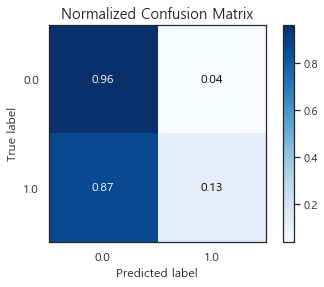

In [941]:
pred_xgb = xgb.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_xgb, normalize=True)
plt.show()

### 12) GaussianNB

In [942]:
gnb = GaussianNB()

In [943]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [944]:
gnb_score = roc_auc_score(y_test,gnb.predict_proba(X_test)[:,1])

In [966]:
score.append(gnb_score)

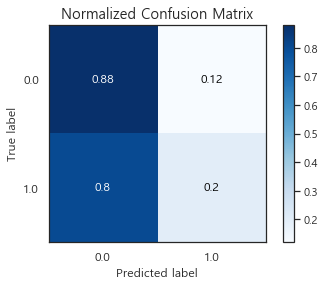

In [946]:
pred_gnb = gnb.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_gnb, normalize=True)
plt.show()

### 13) ExtraClassifier

In [947]:
ec = ExtraTreesClassifier()

In [948]:
ec.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [949]:
ec_score = roc_auc_score(y_test,ec.predict_proba(X_test)[:,1])

In [967]:
score.append(ec_score)

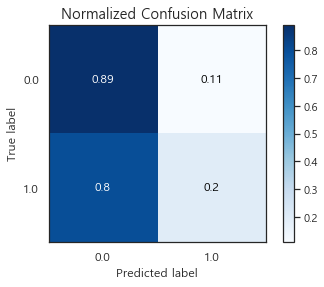

In [951]:
pred_ec = ec.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, pred_ec, normalize=True)
plt.show()

### ※모델 성능 차트

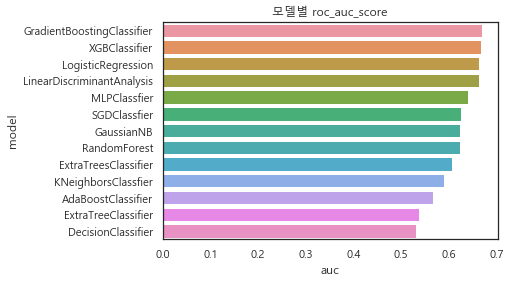

In [969]:
g = pd.DataFrame({'model':['LogisticRegression','DecisionClassifier','RandomForest','KNeighborsClassfier','SGDClassfier','GradientBoostingClassifier',
                       'MLPClassfier','ExtraTreeClassifier','AdaBoostClassifier','LinearDiscriminantAnalysis','XGBClassifier','GaussianNB','ExtraTreesClassifier'],'auc':score}).sort_values(by='auc',ascending=False)
sns.barplot(x='auc',y='model',data=g)
plt.title('모델별 roc_auc_score')
plt.show()

### VotingClassifier(voting='soft')

In [1012]:
voting = VotingClassifier(estimators = [('xgb',xgb),('GBC',GBC),('log_clf',log_clf),('lda',lda)],
                          voting='soft')
voting.fit(X_train,y_train)
roc_auc_score(y_test,voting.predict_proba(X_test)[:,1])

0.6662360817989956

#### 꽤 괜찮은 성능이 나온것을 확인 할 수 있다.

### Geometric Mean

In [830]:
np.random.seed(42)

In [971]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

In [972]:
from scipy.stats.mstats import gmean

pred_log_clf = log_clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
pred_xgb = xgb.fit(X_train, y_train).predict_proba(X_test)[:,1]
pred_GBC = GBC.fit(X_train, y_train).predict_proba(X_test)[:,1]
pred_lda = lda.fit(X_train,y_train).predict_proba(X_test)[:,1]

roc_auc_score(y_test, gmean([pred_log_clf, pred_xgb, pred_GBC,pred_lda], axis=0))

0.6642714062779389

<font color = 'blue'>

#### voting의 성능이 좋아 voting을 택한다.

### 특성 중요도

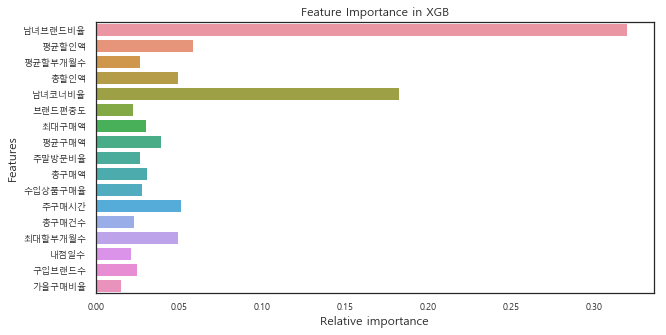

In [973]:
plt.figure(figsize=(10,5))
g = sns.barplot(y=X_train.columns[np.argsort(xgb.feature_importances_[::-1])],x = xgb.feature_importances_[np.argsort(xgb.feature_importances_[::-1])] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Feature Importance in XGB")
plt.show()

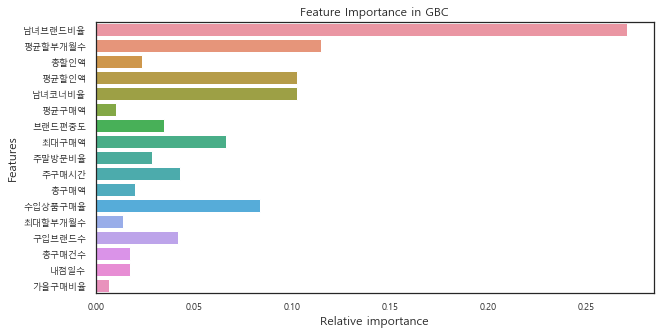

In [974]:
plt.figure(figsize=(10,5))
h = sns.barplot(y=X_train.columns[np.argsort(GBC.feature_importances_[::-1])],x = GBC.feature_importances_[np.argsort(xgb.feature_importances_[::-1])] , orient='h')
h.set_xlabel("Relative importance",fontsize=12)
h.set_ylabel("Features",fontsize=12)
h.tick_params(labelsize=9)
h.set_title("Feature Importance in GBC")
plt.show()

### GridSearchCV

#### GradientBoostingClassifier

In [975]:
gbc = GradientBoostingClassifier(random_state=42)

In [976]:
param =  {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

In [977]:
gs_gbc = GridSearchCV(gbc,param,cv=kfold,n_jobs=-1,verbose=1)

In [985]:
gs_gbc = GradientBoostingClassifier(random_state=42,max_depth=3,learning_rate=0.1)

In [988]:
gs_gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [989]:
roc_auc_score(y_test,gs_gbc.predict_proba(X_test)[:,1])

0.6665070530739824

#### XGBoostClassifier

In [990]:
xgb = XGBClassifier(random_state=42)

In [991]:
param = {'Eta':[0.01,0.015,0.025],'Gamma':[0.05,0.1,0.3],'Max_depth':[3,5,7],'alpha':[0,0.1,0.5]}

In [992]:
gs_xgb = GridSearchCV(xgb,param,n_jobs=-1,verbose=1)

In [993]:
gs_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  3.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'Eta': [0.01, 0.015, 0.025], 'Gamma': [0.05, 0.1, 0.3], 'Max_depth': [3, 5, 7], 'alpha': [0, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [994]:
roc_auc_score(y_test,gs_xgb.best_estimator_.predict_proba(X_test)[:,1])

0.6659336625437431

#### LinearDiscriminantAnalysis

In [995]:
lda = LinearDiscriminantAnalysis()

In [996]:
param = {'n_components':[1,2,3],'solver':['lsqr']}

In [997]:
gs_lda = GridSearchCV(lda,param,cv=kfold,n_jobs=-1)

In [998]:
gs_lda.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=22, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_components': [1, 2, 3], 'solver': ['lsqr']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [999]:
roc_auc_score(y_test,gs_lda.best_estimator_.predict_proba(X_test)[:,1])

0.661038191678568

#### LogisticRegression

In [1000]:
log_clf = LogisticRegression(random_state=42)

In [1001]:
param = {'penalty':['l1','l2'],'C':[0.01,1,100]}

In [1002]:
gs_log_clf = GridSearchCV(log_clf,param,cv=kfold,n_jobs=-1,verbose=1)

In [1003]:
gs_log_clf.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=22, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [1004]:
roc_auc_score(y_test,gs_log_clf.best_estimator_.predict_proba(X_test)[:,1])

0.6611896688610003

### BaggingClassifier

In [1005]:
bagging = BaggingClassifier(base_estimator=GradientBoostingClassifier(), random_state=0)
bagging.fit(X_train, y_train)
roc_auc_score(y_test,bagging.predict_proba(X_test)[:,1])

0.6687682204822836

#### GridSearchCV한 후 votingclassifier

In [1007]:
voting3 = VotingClassifier(estimators = [('xgb',gs_xgb),('GBC',gs_gbc),('log_clf',log_clf),('lda',gs_lda)],
                          voting='soft')
voting3.fit(X_train,y_train)
roc_auc_score(y_test,voting3.predict_proba(X_test)[:,1])

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  3.5min finished


0.6662360817989956

### Stacking은 성능이 급감하고 시간이 오래 걸려 생략하였습니다.

## 최종모델

In [1020]:
submission = pd.DataFrame({'custid':test.custid,'predict':bagging.predict_proba(Xt)[:,1]}).sort_values(by='custid',ascending=True)

In [1023]:
submission.to_csv("기세현-원동욱-submit.csv",index=False,encoding="CP949",header=False)